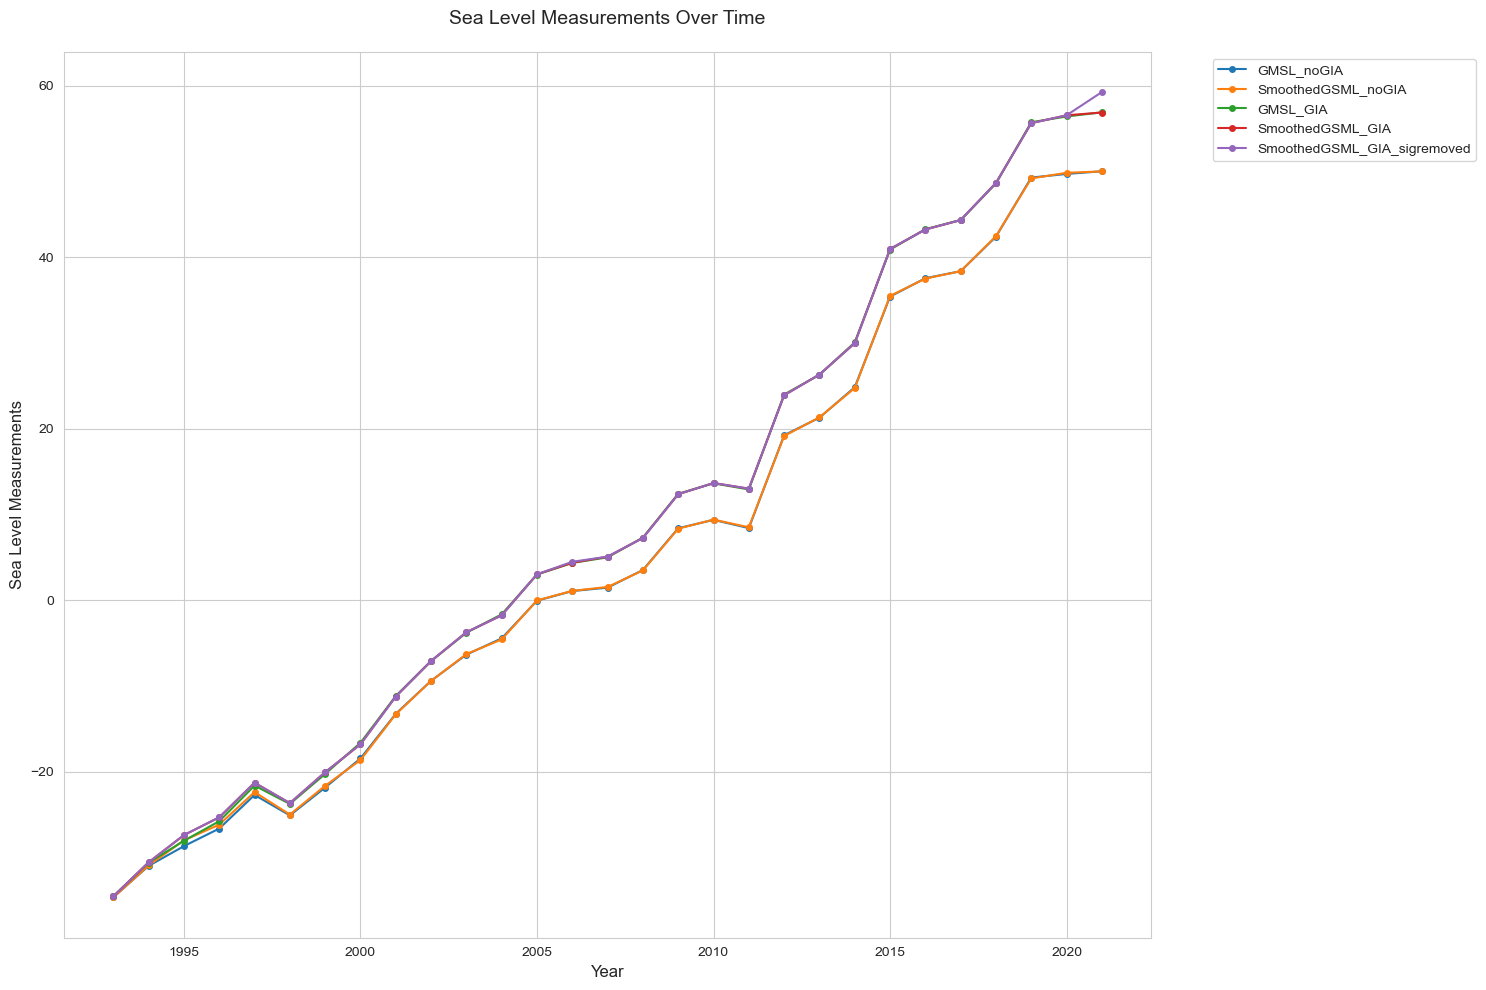

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
# Drop rows with any missing values
df = pd.read_csv('data/sealevel.csv')
df = df.dropna()

# Group by year and calculate mean for all numeric columns
yearly_avg = df.groupby('Year').mean().reset_index()

# Save the averaged data to a new CSV file
yearly_avg.to_csv('data/averaged_sealevel_data.csv', index=False)

# Create the visualization
plt.figure(figsize=(15, 10))

# Set the style
sns.set_style("whitegrid")

# Create line plots for each relevant column
columns_to_plot = [
    'GMSL_noGIA',
    'SmoothedGSML_noGIA',
    'GMSL_GIA',
    'SmoothedGSML_GIA',
    'SmoothedGSML_GIA_sigremoved'
]

# Plot each column
for column in columns_to_plot:
    plt.plot(yearly_avg['Year'], yearly_avg[column], label=column, marker='o', markersize=4)

# Customize the plot
plt.title('Sea Level Measurements Over Time', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea Level Measurements', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('sea_level_trends.png', dpi=300, bbox_inches='tight')
plt.show()